In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [ ]:
int LSM6DS3Class::readAcceleration(float& x, float& y, float& z)
{
  int16_t data[3];

  if (!readRegisters(LSM6DS3_OUTX_L_XL, (uint8_t*)data, sizeof(data))) {
    x = NAN;
    y = NAN;
    z = NAN;

    return 0;
  }

  x = data[0] * 4.0 / 32768.0;
  y = data[1] * 4.0 / 32768.0;
  z = data[2] * 4.0 / 32768.0;

  return 1;
}

In [ ]:
float LSM6DS3::readFloatAccelZ( void )
{
	float output = calcAccel(readRawAccelZ());
	return output;
}

float LSM6DS3::calcAccel( int16_t input )
{
	float output = (float)input * 0.061 * (settings.accelRange >> 1) / 1000;
	return output;
}

In [19]:
4.0 / 32768

0.0001220703125

In [20]:
2000.0 / 32768

0.06103515625

In [15]:
me = 1101

In [ ]:
wyL = bus.read_byte_data(address, 0x24)
wyH = bus.read_byte_data(address, 0x25)
wy = wyH * 256 + wyL
if wy > 32767 :
    wy -= 65536
print(wy)

In [17]:
wyL = 170
wyH = 170
wy = wyH * 256 + wyL
if wy > 32767 :
    wy -= 65536
print(wy)

-21846


In [18]:
65536-21846

43690

In [16]:
wyL = 10101010
wyH = 10101010
wy = wyH * 256 + wyL
if wy > 32767 :
    wy -= 65536
print(wy)

2595894034


1010101010101010 --> 43690
1000000000000000 --> 32768
0000000000000001 --> 1
0000000001001001 --> 73
0010000001001001 --> 8265

In [2]:
def numerical_int(accel_xyz, tdata):
    '''
    This is just vanilla integration of whatever you give it, and integrates twice
    E.g. goes from acceleration to position
    
    accel_xyz is a 3x1 vector of all the accelerations in the XYZ for the rows
    '''
    
    ax_vn, ay_vn, az_vn = accel_xyz[0], accel_xyz[1], accel_xyz[2]

    vx_vn, vy_vn, vz_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
    x_vn, y_vn, z_vn = np.zeros(len(ax_vn)),np.zeros(len(ay_vn)), np.zeros(len(az_vn))
    dt = tdata[1]

    vx_vn = integrate.cumtrapz(ax_vn, tdata, initial=0)
    vy_vn = integrate.cumtrapz(ay_vn, tdata, initial=0)
    vz_vn = integrate.cumtrapz(az_vn, tdata, initial=0)

    x_vn = integrate.cumtrapz(vx_vn, tdata, initial=0)
    y_vn = integrate.cumtrapz(vy_vn, tdata, initial=0)
    z_vn = integrate.cumtrapz(vz_vn, tdata, initial=0)
    
    v_vec = [vx_vn, vy_vn, vz_vn]
    x_vec = [x_vn, y_vn, z_vn]
    
    return v_vec, x_vec

In [11]:
################## CONSTANTS ##################
# gravity
g = 9.81  # m/s^2
# m to ft
ft = 3.2884  # ft/m

################## DATA FRAME ##################
datafile = 'LSM_LOG_20220218-162202.csv'
fields = ['Accel X', 'Accel Y', 'Accel Z', 'Rate X', 'Rate Y', 'Rate Z', 'Time']

df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
tdata = np.linspace(0, 318/208, 318)
L = tdata.shape[0]
# This time is just completely incorrect

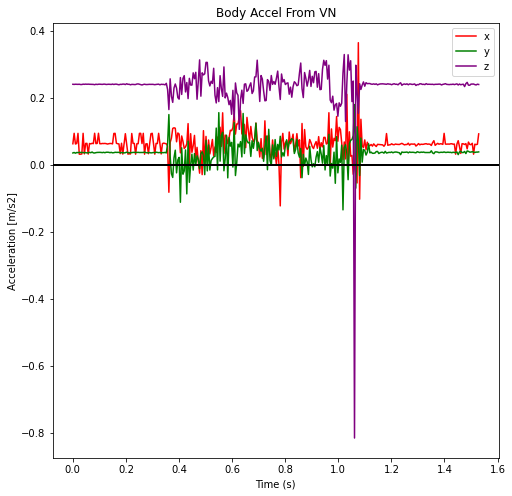

In [12]:
ax_vn = df['Accel X']* 4.0 / 32768.0
ay_vn = df['Accel Y']* 4.0 / 32768.0
az_vn = df['Accel Z']* 4.0 / 32768.0

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ax_vn, color='red', label='x')
l3 = ax.plot(tdata, ay_vn, color='green', label='y')
l4 = ax.plot(tdata, az_vn, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Body Accel From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [m/s2]")
ax.legend()
plt.show()

In [13]:
rx = df['Rate X']* 2000.0 / 32768.0
ry = df['Rate Y']* 2000.0 / 32768.0
rz = df['Rate Z']* 2000.0 / 32768.0

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, rx, color='red', label='x')
l3 = ax.plot(tdata, ry, color='green', label='y')
l4 = ax.plot(tdata, rz, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Gyroscopic Data From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Change in Orientation [deg/s]")
ax.legend()
plt.show()

KeyError: 'Rate X'

ValueError: x and y must have same first dimension, but have shapes (318,) and (348,)

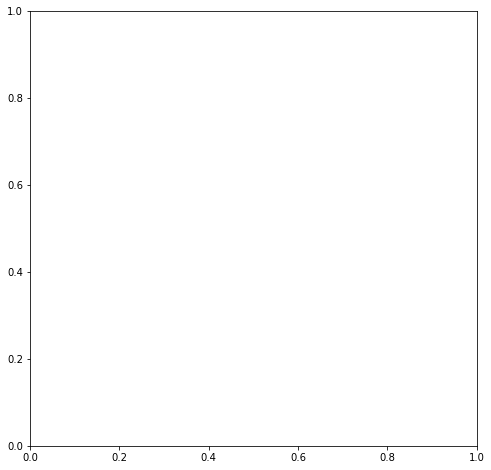

In [8]:
################## DATA FRAME ##################
datafile = 'LSM_LOG_20220218-140401.csv'
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
tdata = np.linspace(0, 318/208, 318)
L = tdata.shape[0]

ax_vn = df['Accel X']* 4.0 / 32768.0
ay_vn = df['Accel Y']* 4.0 / 32768.0
az_vn = df['Accel Z']* 4.0 / 32768.0

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ax_vn, color='red', label='x')
l3 = ax.plot(tdata, ay_vn, color='green', label='y')
l4 = ax.plot(tdata, az_vn, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Body Accel From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [m/s2]")
ax.legend()
plt.show()

In [ ]:
################## DATA FRAME ##################
datafile = 'LSM_LOG_20220218-154936.csv'
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
tdata = np.linspace(0, 318/208, 318)
L = tdata.shape[0]

ax_vn = df['Accel X']* 4.0 / 32768.0
ay_vn = df['Accel Y']* 4.0 / 32768.0
az_vn = df['Accel Z']* 4.0 / 32768.0

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ax_vn, color='red', label='x')
l3 = ax.plot(tdata, ay_vn, color='green', label='y')
l4 = ax.plot(tdata, az_vn, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Body Accel From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [m/s2]")
ax.legend()
plt.show()

In [ ]:
################## DATA FRAME ##################
datafile = 'LSM_LOG_20220218-155951.csv'
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
tdata = np.linspace(0, 318/208, 318)
L = tdata.shape[0]

ax_vn = df['Accel X']* 4.0 / 32768.0
ay_vn = df['Accel Y']* 4.0 / 32768.0
az_vn = df['Accel Z']* 4.0 / 32768.0

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ax_vn, color='red', label='x')
l3 = ax.plot(tdata, ay_vn, color='green', label='y')
l4 = ax.plot(tdata, az_vn, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Body Accel From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [m/s2]")
ax.legend()
plt.show()

In [9]:
################## DATA FRAME ##################
datafile = 'LSM_LOG_20220218-160852.csv'
df = pd.read_csv(datafile, skipinitialspace=True, usecols=fields)

################## INIT VECTORS ##################
tdata = np.linspace(0, 318/208, 318)
L = tdata.shape[0]

ax_vn = df['Accel X']* 4.0 / 32768.0
ay_vn = df['Accel Y']* 4.0 / 32768.0
az_vn = df['Accel Z']* 4.0 / 32768.0

fig1 = plt.figure(1, figsize=(8,8))
ax = plt.subplot(111)
l2 = ax.plot(tdata, ax_vn, color='red', label='x')
l3 = ax.plot(tdata, ay_vn, color='green', label='y')
l4 = ax.plot(tdata, az_vn, color='purple', label='z')
l5 = plt.axhline(y=0, color='black', linewidth=2)
ax.set_title("Body Accel From VN")
ax.set_xlabel('Time (s)')
ax.set_ylabel("Acceleration [m/s2]")
ax.legend()
plt.show()

ValueError: Usecols do not match columns, columns expected but not found: ['Accel X', 'Accel Z', 'Accel Y']